# Finite Differences CapSol Example

Minimal example of using capsol python code to compute the voltage between a SPM tip (sphere, cone, and cantilever body disk) and a metal surface.

In [1]:
 %load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [4]:

import numpy as np
from scipy import linalg
from scipy import sparse
from scipy.sparse import linalg as la
import capsol
import matplotlib.pyplot as plt


In [20]:
params= capsol.Params(Nr=900, Nz_plus=900, rhoMax=20*20000.0, zMax=20*20000.0)

In [21]:
sim = capsol.CapSol(params)

In [22]:
params

Params(Rtip=20.0, theta_deg=15.0, Hcone=15000.0, Hcant=500.0, Rcant=15000.0, zMax=400000.0, rhoMax=400000.0, h0=0.4, d=20.0, Nuni=50, Nr=900, Nz_plus=900, hsam=0.0, theta=0.2617993877991494)

In [23]:
def Totalsim(params, dmin, dmax, istep):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-23-4329e98d4b0b>, line 2)

In [24]:
dmin=10
dmax=20
istep=4

In [25]:
distances=np.arange(dmin, dmax, istep*params.h0)

In [26]:
energies=[]
for d in tqdm(distances):
    params.d= d
    sim = capsol.CapSol(params)
    sim.setup_matrices()
    sim.solve()
    sim.process()
    energies.append(sim.energy)

  0%|          | 0/7 [00:00<?, ?it/s]

In [19]:
from tqdm.notebook import tqdm

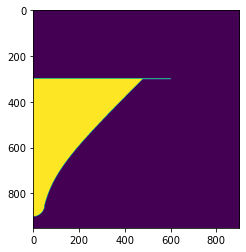

In [10]:
plt.imshow(sim.spm_tip[::-1, :])


In [27]:
energies

[1.708627027912063e-15,
 1.7083348868120583e-15,
 1.7080618749814295e-15,
 1.707803719487859e-15,
 1.7075574671940174e-15,
 1.7073209915502852e-15,
 1.7070927098510846e-15]

In [12]:
%time sim.A = capsol.poisson_variable_spacing_radial(sim.r, sim.z)

CPU times: user 20 s, sys: 391 ms, total: 20.4 s
Wall time: 20.6 s


In [13]:
f = f0 - sim.A @ sim.u.ravel()

In [14]:
full_boundary = sim.boundary
A_cut = sim.A[~full_boundary].T[~full_boundary].T # 
f_cut = f[~full_boundary]

In [15]:
1/A_cut.diagonal()

array([4.00000000e-02, 4.00000000e-02, 4.00000000e-02, ...,
       4.69875373e+06, 4.75134137e+06, 4.80394162e+06])

In [16]:
%time u_cut = la.spsolve(A_cut, f_cut)

CPU times: user 4min 49s, sys: 21.4 s, total: 5min 11s
Wall time: 33.1 s


In [17]:
u = sim.u.ravel()
u[~full_boundary] = u_cut

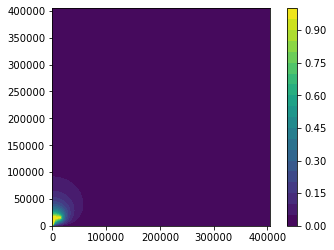

In [18]:
fig, ax = plt.subplots()
s = np.s_[:, :]
plt.contourf(sim.R[s], sim.Z[s], u.reshape((sim.Nz, sim.Nr))[s], levels=20)
plt.colorbar()
ax.set_aspect('equal')

In [19]:
dV = capsol.grid_area(sim.r, sim.z)

In [24]:
energy = 0.5 * np.sum(dV * abs(capsol.E_field(u, sim.r, sim.z))**2) * 1e-9 * 8.854e-12

In [25]:
energy

1.707036771449709e-15

In [26]:
energy_z = 0.5 * np.sum(dV * capsol.E_field(u, sim.r, sim.z).imag**2) * 1e-9 * 8.854e-12

In [29]:
energy_z

1.0095146098372074e-15

In [30]:
# All the energy related to the radial field is not helpful / useful...

In [21]:
E_J = energy * 1e-9 * 8.854e-12
E_J

1.707036771449709e-15

In [31]:
sim

CapSol(params=Params(Rtip=20.0, theta_deg=15.0, Hcone=15000.0, Hcant=500.0, Rcant=15000.0, zMax=400000.0, rhoMax=400000.0, h0=0.4, d=20.0, Nuni=50, Nr=900, Nz_plus=900, hsam=0.0, theta=0.2617993877991494))

In [23]:
# E-field is V/m, here V/nm...
# dV = nm^3
# Units are V^2 * nm...